<a href="https://colab.research.google.com/github/tanmaychikhale/MachineLearning/blob/main/Pract5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [3]:
print(df.isnull().sum())

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']] = imputer.fit_transform(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']])

# Select relevant features for clustering
X = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


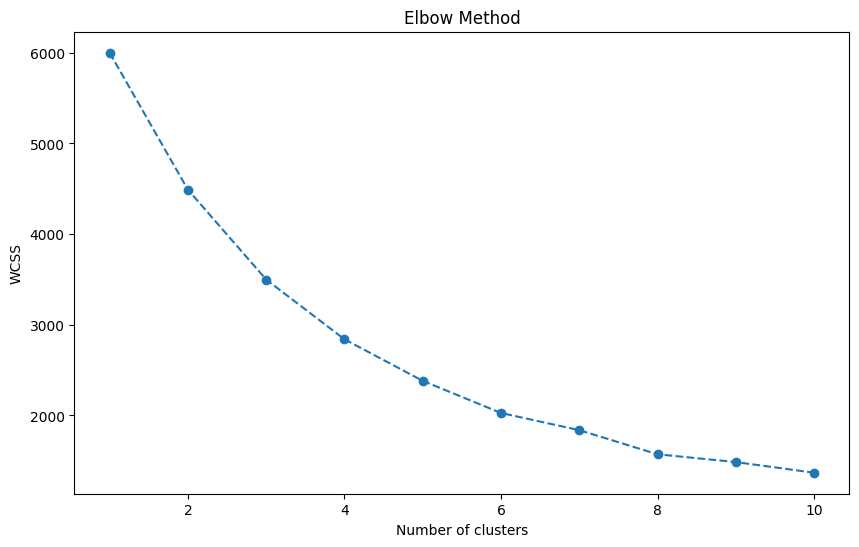

In [8]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

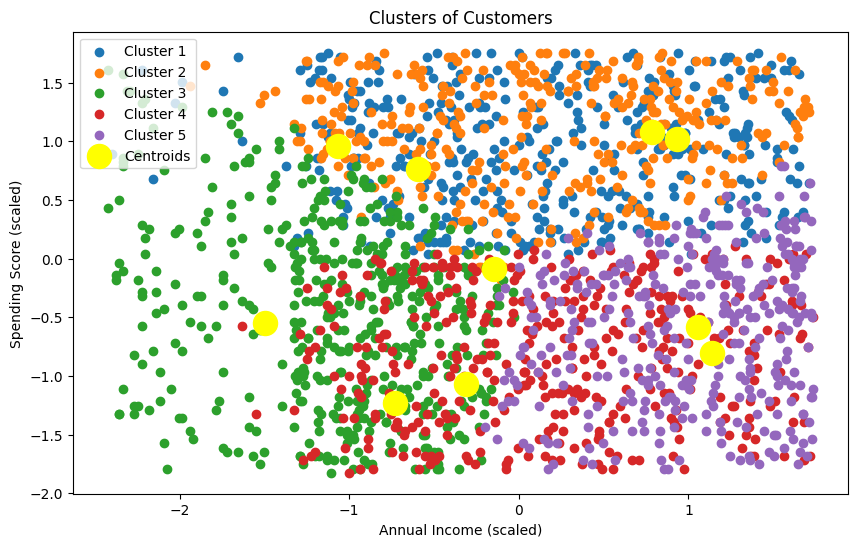

In [10]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(X_scaled[df['Cluster'] == cluster, 1], X_scaled[df['Cluster'] == cluster, 2],
                label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


#Cluster 1: Customers with low annual income and low spending score.
#Cluster 2: Customers with high annual income and high spending score.
#Cluster 3: Customers with medium annual income and medium spending score.
#Cluster 4: Customers with high annual income but low spending score.
#Cluster 5: Customers with low annual income but high spending score.